
<div class="clearfix" style="padding: 10px; padding-left: 0px">
    <img src="http://corporate.renault-trucks.com/media/image/CP-jpg/logo_ecole_centrale_lyon.jpg" width="450px" style="display: inline-block; margin-top: 5px;"/>
    <br/>
    <br/>
    <br/>
    <h1 style="color:rgb(150,0,0)">  Séance 1 : Parsing des données et premier affichage </h1>
</div>

<h1 style="color:rgb(150,0,0)">  I. Présentation de la séance </h1>

<h2 style="color:rgb(0,0,150)"> A. Objectifs </h2>
<p>
Cette séance sera consacrée au chargement des données de Google TakeOut et à une première visualisation.
<br/>
Nous nous sommes en particulier inspiré du repository GitHub <a href= https://gist.github.com/chrisalbon/0a55b7b5ef6584e672cd > suivant.</a>  
<br/> Pour l'affichage des données sur une carte; nous ne visons pas une correspondance parfaite entre les points relevés et le fond de carte. Il s'agit plutôt de travailler sur une représentation qui nous permette de comprendre à quoi correspondent les différents points.
</p>

<h2 style="color:rgb(0,0,150)"> B. Analyse technique</h2>
<p>
Les données Google TakeOut sont des fichiers JSON extremement long. Pour les exploiter, nous allons utiliser les objets <b> panda.dataFrame </b> .
<br/> Pour commencer, nous allons travailler sur les données de géolocalisation s'étalant sur une année d'une personne de notre groupe.
<br/>
</p>

<h1 style="color:rgb(150,0,0)">  II. Code  </h1>

<h2 style="color:rgb(0,0,150)"> A. Extraction des données JSON</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# Loading data
file = "Data/Takout/anonymous_2015.json"
raw = pd.io.json.read_json(file)

In [3]:
# Expand the locations column into a dataframe
# This lets us move down one level in the json structure
df = raw['locations'].apply(pd.Series)

### Visulation des données extraites du fichiers json. 

In [4]:
df

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity
0,103,NaN,NaN,NaN,377611139,-1224707537,1468723321167,NaN
1,12,NaN,36.0,NaN,377611139,-1224707537,1468723302999,0.0
2,12,NaN,49.0,NaN,377611139,-1224707537,1468723287999,0.0
3,20,"[{'timestampMs': '1468723265584', 'activity': ...",NaN,NaN,377610871,-1224706561,1468723272489,NaN
4,12,NaN,16.0,NaN,377613962,-1224707777,1468723251000,0.0
5,24,NaN,-2.0,97.0,377614779,-1224708291,1468723235859,0.0
6,8,NaN,53.0,NaN,377611288,-1224706699,1468723213999,0.0
7,8,"[{'timestampMs': '1468723193414', 'activity': ...",45.0,NaN,377611288,-1224706699,1468723197999,0.0
8,113,NaN,NaN,NaN,377613010,-1224708133,1468723182663,NaN
9,12,NaN,43.0,NaN,377613010,-1224708133,1468723163000,0.0


### Transformation des lattitudes et longitudes au format standart

In [5]:
# Create a list from the latitude and the longitude column, multiplied by -E7
df['latitude'] = df['latitudeE7'] * 0.0000001
df['longitude'] = df['longitudeE7'] * 0.0000001

<div >

<h2 style="color:rgb(0,0,150)"> B. Premier affichage sur une carte </h2> 

On affiche dans un premier temps les données sur la France entière, pour cela il faut précsier les latitudes extrèmes du plan sur lequel on souhaite se placer. 

In [6]:
 map = Basemap(projection='merc', lat_0=0, lon_0=0,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=-5, llcrnrlat=42,
    urcrnrlon=9, urcrnrlat=51)

In [7]:
x,y = map(df['longitude'].values, df['latitude'].values)

/Users/roland/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/roland/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


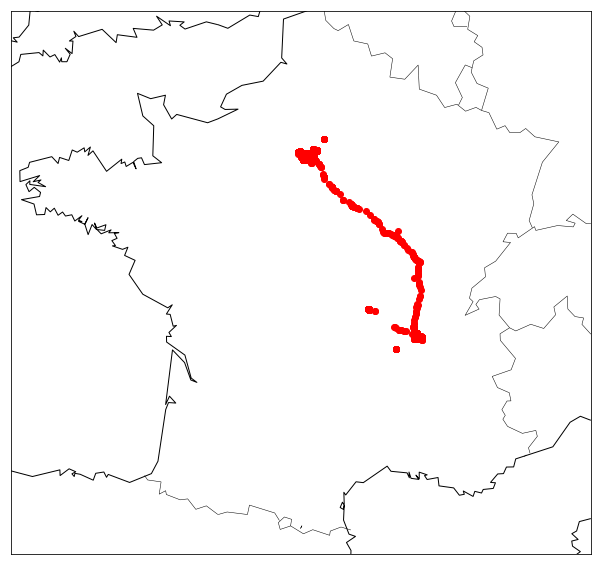

In [8]:
plt.figure(figsize=(20, 10))
map.drawcountries()
map.drawcoastlines()
map.plot(x, y, 'ro', markersize=6)
plt.show()

### Visualisation des données sur la ville de Lyon

In [9]:
lyon_map = Basemap(projection='merc', lat_0=0, lon_0=0,
    resolution = 'h', area_thresh = 1,
    llcrnrlon=4.715027, llcrnrlat=45.666496,
    urcrnrlon=5.039811, urcrnrlat=45.866714)

/Users/roland/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/roland/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


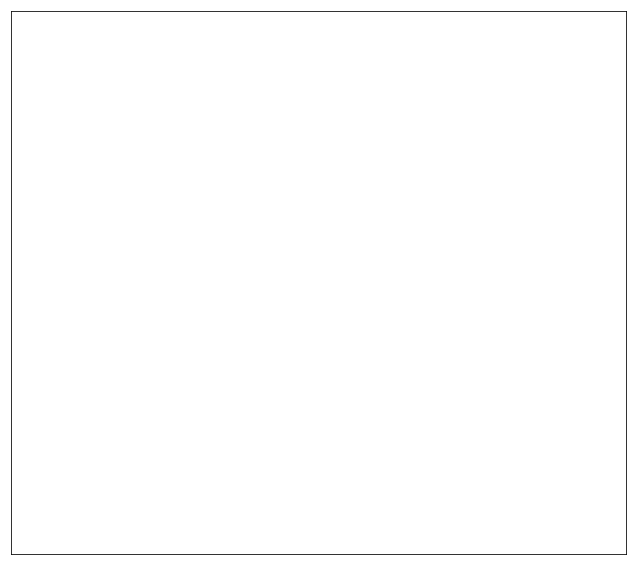

In [10]:
plt.figure(figsize=(20,10))
lyon_map.drawcountries()
lyon_map.drawcoastlines()
lyon_map.plot(x, y, 'ro', markersize=3)
plt.show()

<h1 style="color:rgb(150,0,0)">  III. Conclusion</h1>

<h2 style="color:rgb(0,0,150)"> A. Bilan</h2>

Cette séance, nous sommes parvenus à nos objectifs. Toutefois nous notons que le fond de carte que nous utilisons n'est pas très adapté. Il ne représente que les frontières des pays; il n'est donc d'aucune aide pour représenter les trajets au sein d'une ville. 

<h2 style="color:rgb(0,0,150)"> B. Travail à faire de la prochaine séance </h2>
<br/>
Lors de la prochaine séance, nous travaillerons sur :
<ul> 
    <li> Enlever les fonctions 'depricated' </li> 
    <li> Re-travailler sur le fond de carte </li> 
    <li> Organiser nos données pour pouvoir y accéder jour par jour </li>
    <li> Tracer de premiers trajets, ie relier les points de façon cohérente </li>
    <li> Commencer à travailler sur le nettoyage des trajets </li>
</ul> 